# AAAI 2019 FALL SYMPOSIUM

### ### Quantifying Classification Uncertainty using Regularized Evidential Neural Networks
### Xujiang Zhao
### Yuzhe Ou

## Mathematical background

Traditional deep neural nets (NNs) have shown the state-of-the-art performance in the task of classification in various applications. However, NNs have not considered any types of uncertainty associated with the class probabilities
to minimize risk due to misclassification under uncertainty in real life. Unlike Bayesian neural nets indirectly infering uncertainty through weight uncertainties, evidential neural networks (ENNs) have been recently proposed to support explicit modeling of the uncertainty of class probabilities.  It treats predictions of an NN as subjective opinions and learns the function by collecting the evidence leading to these opinions by a deterministic NN from data. However, an ENN is trained as a black box without explicitly considering different types of inherent data uncertainty, such as vacuity (uncertainty due to a lack of evidence) or dissonance (uncertainty due to conflicting evidence). This paper presents a new approach, called a regularized ENN, that learns an ENN based on regularizations related to different characteristics of inherent data uncertainty. Via the experiments with both synthetic and real-world datasets, we demonstrate that the proposed regularized ENN can better learn of an ENN modeling different types of uncertainty in the class probabilities for classification tasks. 

### Theory of Evidence
Suppose that there are $K$ outputs of an NN. Then we can write the following equality
$$u + \sum_{k = 1}^{K} b_k = 1$$
where $b_k$ corresponds to $k^{th}$ ReLU output which will be interpreted as the *belief mass* of the $k^{th}$ class and $u$ is the *uncertainty mass* of the particular outputs.

Each $b_k$ is defined as follows
$$b_k =\frac{e_k}{S}$$
where $e_k$ is the evidence of the $k^{th}$ class and $S$ is the strength of the Dirichlet we'll use and defined as 
$$S = \sum_{k = 1}^{K} (e_k + 1)$$
which leaves $u$ the following portion
$$u = \frac{K}{S}$$


Replacing $e_k + 1$ with $a_k$
$$\alpha_k = e_k + 1$$
and using the resultant simplex vector $a$ in a Dirichlet as the density
$$
D(\boldsymbol{p}|\boldsymbol{\alpha}) = \begin{cases} 
      \frac{1}{B(\boldsymbol{\alpha})} \prod_{i=1}^{K} p_i^{\alpha_i - 1} & \text{for } \boldsymbol{p} \in \mathcal{S}_K \\
      0 & \text{otherwise}
   \end{cases}
$$

As a result, we can define $\mathcal{S}_K$ as 
$$\mathcal{S}_K = \{ \boldsymbol{p} | \sum_{i=1}^K p_i = 1 \text{ and } 0 \leq p_1,...,p_K \leq 1 \}$$
and the probability of $k^{th}$ can still be calculated as
$$\hat{p}_k = \frac{\alpha_k}{S}$$

### Loss Functions



####  Using sum of squares loss - will be mentioned as *Eqn. 9* (as in the paper)

$$
\mathcal{L}_i(\Theta) =
\int ||\boldsymbol{y}_i - \boldsymbol{p}_i||_2^2 \frac{1}{B(\alpha_i)} \prod_{j=1}^K p_{ij}^{\alpha_{ij} -1 } d\boldsymbol{p}_i 
= \sum_{j=1}^K \mathbb{E}[(y_{ij} - p_{ij})^2]
$$

$$
= \sum_{j=1}^K \mathbb{E}[y_{ij}^2 - 2 y_{ij}p_{ij} + p_{ij}^2] 
= \sum_{j=1}^K (y_{ij}^2 - 2 y_{ij}\mathbb{E}[p_{ij}] + \mathbb{E}[p_{ij}^2])
$$

$$
= \sum_{j=1}^K (y_{ij}^2 - 2 y_{ij}\mathbb{E}[p_{ij}] + \mathbb{E}[p_{ij}]^2 + \text{Var}(p_{ij}))
= \sum_{j=1}^K (y_{ij} - \mathbb{E}[p_{ij}])^2 + \text{Var}(p_{ij})
$$

$$
= \sum_{j=1}^K (y_{ij}^2 - 2 y_{ij}\mathbb{E}[p_{ij}] + \mathbb{E}[p_{ij}]^2 + \text{Var}(p_{ij}))
= \sum_{j=1}^K (y_{ij} - \mathbb{E}[p_{ij}])^2 + \text{Var}(p_{ij})
$$

$$
= \sum_{j=1}^K (y_{ij} - \frac{\alpha_{ij}}{S_i})^2 + \frac{\alpha_{ij}(S_i - \alpha_{ij})}{S_i^2(S_i + 1)}
$$

$$
= \sum_{j=1}^K (y_{ij} - \hat{p}_{ij})^2 + \frac{\hat{p}_{ij}(1 - \hat{p}_{ij})}{(S_i + 1)}
$$

### Regularization with KL Divergence

$$
\mathcal{L}(\Theta) = \sum_{i=1}^N \mathcal{L}_i(\Theta) + \lambda_t \sum_{i=1}^N KL[ D(\boldsymbol{p}_i|\boldsymbol{\widetilde{\alpha}}_i)||  D(\boldsymbol{p}_i|\langle 1,...,1 \rangle )]
$$

where $\lambda_t$ is annealed during the training by starting from 0 up to 1.

After the derivations, KL term turns out to be in the following form
$$
KL[ D(\boldsymbol{p}_i|\boldsymbol{\widetilde{\alpha}}_i)||  D(\boldsymbol{p}_i|\langle 1,...,1 \rangle )] = log(\frac{\Gamma(\sum_{k=1}^K \widetilde{\alpha}_{ik})}{\Gamma(K)\prod_{k=1}^K\Gamma(\widetilde{\alpha}_{ik})}) + \sum_{k=1}^K (\widetilde{\alpha}_{ik} - 1) [\psi(\widetilde{\alpha}_{ik}) - \psi(\sum_{k=1}^K \widetilde{\alpha}_{ik})]
$$

### Regularization with Vacuity uncertainty
To improve the perfomance of out-of-distribution detection, we introduce the uncertainty regularization to object function.

$$
\mathcal{L}(\Theta) = \mathbb{E}_{({\bf x}_i, {\bf y}_i) \sim \mathcal{D}}[\mathcal{L}(f({\bf x}_i|\Theta), {\bf y}_i) ] -\nonumber \\
 \lambda_1   \mathbb{E}_{({\bf x}_i, {\bf y}_i) \sim \mathcal{D}_{\text{OOD}}}[\text{Vac}(f({\bf x}_i|\Theta))] - \nonumber \\
 \lambda_2   \mathbb{E}_{({\bf x}_i, {\bf y}_i) \sim \mathcal{D}_{\text{BOD}}}[\text{Diss}(f({\bf x}_i|\Theta))],
$$




## Code

##### Import required libraries

In [0]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist.input_data import read_data_sets as mnist_data_downloader
from tensorflow.keras.datasets.cifar10 import load_data as cifar_data_downloader

import scipy.ndimage as nd
import numpy as np
from matplotlib import pyplot as plt
import pylab as pl
from IPython import display

import scipy.stats
import scipy.io

##### Download datasets

In [0]:
#get mnist dataset
mnist = mnist_data_downloader('MNIST_data', one_hot=True)

#get cifar dataset
(cifar10_x_train, cifar10_y_train), (cifar10_x_test, cifar10_y_test) = cifar_data_downloader()
cifar10_x_train = cifar10_x_train.reshape(50000, 32*32*3) / 255
cifar10_y_train = cifar10_y_train.reshape(50000)
cifar10_x_test = cifar10_x_test.reshape(10000, 32*32*3) / 255
cifar10_y_test = cifar10_y_test.reshape(10000)

cifar5_x_train = cifar10_x_train[cifar10_y_train<5,:]
cifar5_y_train = cifar10_y_train[cifar10_y_train<5]

cifar5_x_train_test = cifar10_x_test[cifar10_y_test<5,:]
cifar5_y_train_test = cifar10_y_test[cifar10_y_test<5]

cifar5_x_test = cifar10_x_train[cifar10_y_train>=5,:]
cifar5_y_test = cifar10_y_train[cifar10_y_train>=5]

cifar5_x_ood_train = cifar5_x_test[cifar5_y_test>=8,:]
cifar5_y_ood_train = cifar5_y_test[cifar5_y_test>=8]
cifar5_x_ood_test = cifar5_x_test[cifar5_y_test<8,:]
cifar5_y_ood_test = cifar5_y_test[cifar5_y_test<8]
print(cifar5_y_ood_train)
print(cifar5_y_ood_test)
cifar5_y_train = np.eye(5)[cifar5_y_train]
cifar5_y_test = np.eye(5)[cifar5_y_test - 5]
cifar5_y_ood_train = np.eye(5)[cifar5_y_ood_train - 5]
cifar5_y_ood_test = np.eye(5)[cifar5_y_ood_test - 5]
cifar5_y_train_test = np.eye(5)[cifar5_y_train_test]

#download notmnist dataset
!wget http://yaroslavvb.com/upload/notMNIST/notMNIST_small.mat
  
notmnist = scipy.io.loadmat("notMNIST_small.mat")
notmnist_x = np.array(notmnist["images"]).reshape(28*28,18724).transpose() / 255
notmnist_y = np.eye(10)[np.array(notmnist["labels"]).astype(int)]

#####  <font color=yellow>(Get bounday data )</font>

In [0]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import entropy

def sample_mask(idx, l):
    """Create mask."""
    mask = np.zeros(l)
    mask[idx] = 1
    return np.array(mask, dtype=np.bool)

dissonance_sample = 10 ## number of top dissonance node to choose
sample_k = 10 ## number of nearest label node to choose
bsize = 1000
n_batches = cifar5_x_train.shape[0] // bsize

dissonance_mask = []
for i in range(n_batches):
      data = cifar5_x_train[i*bsize:min((i+1)*bsize, cifar5_x_train.shape[0]),:]
      label = cifar5_y_train[i*bsize:min((i+1)*bsize, cifar5_y_train.shape[0]),:]
      score = cosine_similarity(data, data)
      score_list = []
      for item in score:
        item_index = item.argsort()[-sample_k:][::-1]
        near_label = label[item_index]
        d_score = np.sum(near_label, axis=0)/sample_k
        d_score = entropy(d_score)
        score_list.append(d_score)
      score_list = np.asarray(score_list)
      dissonance_index = score_list.argsort()[-dissonance_sample:][::-1]
      mask_i = sample_mask(dissonance_index, label.shape[0])
      dissonance_mask.append(mask_i)




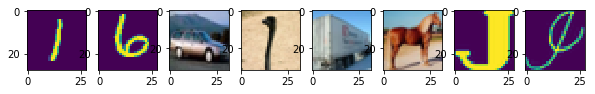

In [0]:
# display a couple of pictures from the dataset

digit = mnist.train.images[4].copy()
digit2 = mnist.train.images[222].copy()

i = 0
plt.figure(figsize=(10,10))
for image, size in ((digit, (28,28)), 
                    (digit2, (28,28)), 
                    (cifar5_x_train[1], (32,32,3)),
                    (cifar5_x_train[23], (32,32,3)),
                    (cifar5_x_ood_train[4], (32,32,3)),
                    (cifar5_x_ood_test[11], (32,32,3)),
                    (notmnist_x[6], (28, 28)),
                    (notmnist_x[7], (28,28))):
  i+=1
  plt.subplot(1,8,i)
  plt.grid(False)
  plt.imshow(image.copy().reshape(size))

##### Utility functions

In [0]:
#### Logit to evidence converters - activation functions (they have to produce non-negative outputs for the uncertaintyuncertainity process)

def relu_evidence(logits):
    return tf.nn.relu(logits)

def exp_evidence(logits): 
    return tf.exp(logits/100)
  
def relu6_evidence(logits):
    return tf.nn.relu6(logits)
  
def softsign_evidence(logits):
    return tf.nn.softsign(logits)

  
#### KL Divergence calculator

def KL(alpha, K):
    beta=tf.constant(np.ones((1,K)),dtype=tf.float32)
    S_alpha = tf.reduce_sum(alpha,axis=1,keepdims=True)
    
    KL = tf.reduce_sum((alpha - beta)*(tf.digamma(alpha)-tf.digamma(S_alpha)),axis=1,keepdims=True) + \
         tf.lgamma(S_alpha) - tf.reduce_sum(tf.lgamma(alpha),axis=1,keepdims=True) + \
         tf.reduce_sum(tf.lgamma(beta),axis=1,keepdims=True) - tf.lgamma(tf.reduce_sum(beta,axis=1,keepdims=True))
    return KL


##### Loss functions (there are three different one defined in the papaer)
def loss_eq6(p, alpha, K, global_step, annealing_step):
    S = tf.reduce_sum(alpha, axis=1, keepdims=True)
    loglikelihood = tf.reduce_sum((p-(alpha/S))**2, axis=1, keepdims=True) + tf.reduce_sum(alpha*(S-alpha)/(S*S*(S+1)), axis=1, keepdims=True)
    KL_reg =  tf.minimum(1.0, tf.cast(global_step/annealing_step, tf.float32)) * KL((alpha - 1)*(1-p) + 1 , K)
    return loglikelihood

def loss_eq5(p, alpha, K, global_step, annealing_step):
    S = tf.reduce_sum(alpha, axis=1, keepdims=True)
    loglikelihood = tf.reduce_sum((p-(alpha/S))**2, axis=1, keepdims=True) + tf.reduce_sum(alpha*(S-alpha)/(S*S*(S+1)), axis=1, keepdims=True)
    KL_reg =  tf.minimum(1.0, tf.cast(global_step/annealing_step, tf.float32)) * KL((alpha - 1)*(1-p) + 1 , K)
    return loglikelihood + KL_reg

def loss_eq4(p, alpha, K, global_step, annealing_step):
    loglikelihood = tf.reduce_mean(tf.reduce_sum(p * (tf.digamma(tf.reduce_sum(alpha, axis=1, keepdims=True)) - tf.digamma(alpha)), 1, keepdims=True))
    KL_reg =  tf.minimum(1.0, tf.cast(global_step/annealing_step, tf.float32)) * KL((alpha - 1)*(1-p) + 1 , K)
    return loglikelihood + KL_reg

def loss_eq3(p, alpha, K, global_step, annealing_step):
    loglikelihood = tf.reduce_mean(tf.reduce_sum(p * (tf.log(tf.reduce_sum(alpha, axis=1, keepdims=True)) - tf.log(alpha)), 1, keepdims=True))
    KL_reg =  tf.minimum(1.0, tf.cast(global_step/annealing_step, tf.float32)) * KL((alpha - 1)*(1-p) + 1 , K)
    return loglikelihood + KL_reg



#####  <font color=yellow>Dissonance utility function</font>

In [0]:
def dissonance_tf(evidence):
    alpha = evidence + 1.0
    S = tf.reduce_sum(alpha, axis=1, keepdims=True)
    belief = evidence / S
    dis_un = 0
    list_k = np.arange(5)
    for i in range(5):
      list_j = np.delete(list_k, i)
      bal_i = belief[:, i]
      dis_i = 0
      score_ij = 0
      score_j = 0
      for j in list_j:
        bal_j = belief[:, j]
        bal_ij = Bal_tf(bal_i, bal_j)
        score_ij += bal_ij * bal_j
        score_j += bal_j 
      dis_i += bal_i * score_ij / (score_j + 1e-8)
      dis_un += dis_i
    return dis_un
        
 
def Bal_tf(b_i, b_j):
    result = 1 - tf.abs(b_i - b_j) / (b_i + b_j + 1e-8)
    return result
  
def masked_dissonance_loss(loss, mask):
    mask = tf.cast(mask, dtype=tf.float32)
    mask /= tf.reduce_mean(mask)
    loss *= mask
    return tf.reduce_mean(loss)
  
  
def dissonance_uncertainty_edl(evidence):
    alpha = evidence + 1.0
    S = np.sum(alpha, axis=1, keepdims=True)
    belief = evidence / S
    dis_un = np.zeros_like(S)
    for k in range(belief.shape[0]):
        for i in range(belief.shape[1]):
            bi = belief[k][i]
            term_Bal = 0.0
            term_bj = 0.0
            for j in range(belief.shape[1]):
                if j != i:
                    bj = belief[k][j]
                    term_Bal += bj * Bal(bi, bj)
                    term_bj += bj
            dis_ki = bi * term_Bal / (term_bj + 1e-8)
            dis_un[k] += dis_ki
 
    return dis_un
 
def Bal(b_i, b_j):
    result = 1 - np.abs(b_i - b_j) / (b_i + b_j + 1e-8)
    return result

In [0]:
evi = np.array([[0.6, 0.01, 0.05]])
diss = dissonance_uncertainty_edl(evi)
print(diss)

[[0.02420771]]


##### Drawing functions

In [0]:
#### Graphs of total evidence & uncertainty for test/train datasets (plus their classification accuracies)

def draw_EDL_results(K, train_acc1, train_ev_s, train_ev_f, test_acc1, test_ev_s, test_ev_f): 
    # calculate uncertainty for training and testing data for correctly and misclassified samples
    train_u_succ = K / (K+np.array(train_ev_s))
    train_u_fail = K / (K+np.array(train_ev_f))
    test_u_succ  = K / (K+np.array(test_ev_s))
    test_u_fail  = K / (K+np.array(test_ev_f))
    
    f, axs = pl.subplots(2, 2)
    f.set_size_inches([10,10])
    
    axs[0,0].plot(train_ev_s,c='r',marker='+')
    axs[0,0].plot(train_ev_f,c='k',marker='x')
    axs[0,0].set_title('Train Data')
    axs[0,0].set_xlabel('Epoch')
    axs[0,0].set_ylabel('Estimated total evidence for classification') 
    axs[0,0].legend(['Correct Clasifications','Misclasifications'])
    
    axs[0,1].plot(train_u_succ,c='r',marker='+')
    axs[0,1].plot(train_u_fail,c='k',marker='x')
    axs[0,1].plot(train_acc1,c='blue',marker='*')
    axs[0,1].set_title('Train Data')
    axs[0,1].set_xlabel('Epoch')
    axs[0,1].set_ylabel('Estimated uncertainty for classification')
    axs[0,1].legend(['Correct clasifications','Misclasifications', 'Accuracy'])
    
    axs[1,0].plot(test_ev_s,c='r',marker='+')
    axs[1,0].plot(test_ev_f,c='k',marker='x')
    axs[1,0].set_title('Test Data')
    axs[1,0].set_xlabel('Epoch')
    axs[1,0].set_ylabel('Estimated total evidence for classification') 
    axs[1,0].legend(['Correct Clasifications','Misclasifications'])
    
    axs[1,1].plot(test_u_succ,c='r',marker='+')
    axs[1,1].plot(test_u_fail,c='k',marker='x')
    axs[1,1].plot(test_acc1,c='blue',marker='*')
    axs[1,1].set_title('Test Data')
    axs[1,1].set_xlabel('Epoch')
    axs[1,1].set_ylabel('Estimated uncertainty for classification')
    axs[1,1].legend(['Correct clasifications','Misclasifications', 'Accuracy'])
    
    plt.show()

    
#### Graph for image rotation experiment

def rotating_image_classification(img, sess, prob, X, keep_prob, K, uncertainty=None, dims=(28,28), threshold=0.25, c=['black','blue','brown','purple','cyan','red'], marker=['s','^','o']*2):
    Mdeg = 180 
    Ndeg = Mdeg//10+1
    ldeg = []
    lp = []
    lu = []
    scores = np.zeros((1, K))
    rot_imgs = np.zeros((dims[0], dims[1]*Ndeg))
    for i,deg in enumerate(np.linspace(0, Mdeg, Ndeg)):
        rot_img = nd.rotate(img.reshape(*dims), deg, reshape=False).reshape(*dims)
        rot_img = np.clip(a=rot_img, a_min=0, a_max=1)
        rot_imgs[:,i*dims[1]:(i+1)*dims[1]] = 1 - rot_img
        feed_dict={X:rot_img.reshape(1,-1), keep_prob:1.0}
        if uncertainty is None:
            p_pred_t = sess.run(prob, feed_dict=feed_dict)
        else:
            p_pred_t,u = sess.run([prob,uncertainty], feed_dict=feed_dict)
            lu.append(u.mean())
        scores += p_pred_t >= threshold
        ldeg.append(deg) 
        lp.append(p_pred_t[0])
    
    labels = np.arange(K)[scores[0].astype(bool)]
    lp = np.array(lp)[:,labels]
    labels = labels.tolist()
    
    plt.figure(figsize=[6,6])
    for i in range(len(labels)):
        plt.plot(ldeg, lp[:,i], marker=marker[i], c=c[i])
    
    if uncertainty is not None:
        labels += ['uncertainty']
        plt.plot(ldeg,lu,marker='<',c='red')
        
    plt.legend(labels)
 
    plt.xlim([0,Mdeg])  
    plt.xlabel('Rotation Degree')
    plt.ylabel('Classification Probability')
    plt.show()

    plt.figure(figsize=[6.4,100])
    plt.imshow(rot_imgs,cmap='gray')
    plt.axis('off')
    plt.show()

### Models

##### LeNet with softmax cross entropy loss function

In [0]:
def var(name, shape, init=None):
    init = tf.truncated_normal_initializer(stddev=(2/shape[0])**0.5) if init is None else init
    return tf.get_variable(name=name, shape=shape, dtype=tf.float32, initializer=init)

def LeNet_softmax(K, lmb=0.005, dims=(28,28), nch=1): 
    g = tf.Graph()
    with g.as_default():
        X = tf.placeholder(shape=[None,np.prod(dims)*nch], dtype=tf.float32)
        Y = tf.placeholder(shape=[None,K], dtype=tf.float32)
        keep_prob = tf.placeholder(dtype=tf.float32)
        
        W1 = var('W1', [5,5,nch,20])
        b1 = var('b1', [20])
        c1 = tf.nn.conv2d(tf.reshape(X, [-1, *dims, nch]), W1, [1, 1, 1, 1], 'SAME')
        r1 = tf.nn.relu(c1 + b1)
        out1 = tf.nn.max_pool(r1, [1, 2, 2, 1], [1, 2, 2, 1], 'SAME')
        
        W2 = var('W2', [5,5,20,50])
        b2 = var('b2', [50])
        c2 = tf.nn.conv2d(out1, W2, [1, 1, 1, 1], 'SAME')
        r2 = tf.nn.relu(c2 + b2)
        out2 = tf.nn.max_pool(r2, [1, 2, 2, 1], [1, 2, 2, 1], 'SAME')
        
        Xflat = tf.contrib.layers.flatten(out2)

        W3 = var('W3', [Xflat.get_shape()[1].value, 500])
        b3 = var('b3', [500]) 
        out3 = tf.nn.relu(tf.matmul(Xflat, W3) + b3)
        out3 = tf.nn.dropout(out3, keep_prob=keep_prob)

        W4 = var('W4', [500,K])
        b4 = var('b4', [K])
        logits = tf.matmul(out3, W4) + b4
        
        prob = tf.nn.softmax(logits=logits) 
        
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))
        l2_loss = (tf.nn.l2_loss(W3)+tf.nn.l2_loss(W4)) * lmb
        
        step = tf.train.AdamOptimizer().minimize(loss + l2_loss)
        
        acc = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(prob, 1), tf.argmax(Y, 1)), tf.float32))
        
        return g, step, X, Y, keep_prob, prob, acc, loss

##### LeNet with expected mean square error loss <font color=red>(Add the loss for out of distributino)</font>

In [0]:
def var(name, shape, init=None):
    init = tf.truncated_normal_initializer(stddev=(2/shape[0])**0.5) if init is None else init
    return tf.get_variable(name=name, shape=shape, dtype=tf.float32, initializer=init)
  
def LeNet_EDL(K, loss_function, logits2evidence=relu_evidence, lmb=0.005, dims=(28,28), nch=1):
    g = tf.Graph()
    with g.as_default():
        X = tf.placeholder(shape=[None,np.prod(dims)*nch], dtype=tf.float32)
        Y = tf.placeholder(shape=[None,K], dtype=tf.float32)
        keep_prob = tf.placeholder(dtype=tf.float32)
        out_statue = tf.placeholder_with_default(False, shape=()) # control the uncertainty regularization loss

        global_step = tf.Variable(initial_value=0, name='global_step', trainable=False)
        annealing_step = tf.placeholder(dtype=tf.int32) 
    
        W1 = var('W1', [5,5,nch,20])
        b1 = var('b1', [20])
        c1 = tf.nn.conv2d(tf.reshape(X, [-1, *dims, nch]), W1, [1, 1, 1, 1], 'SAME')
        r1 = tf.nn.relu(c1 + b1)
        out1 = tf.nn.max_pool(r1, [1, 2, 2, 1], [1, 2, 2, 1], 'SAME')
        
        W2 = var('W2', [5,5,20,50])
        b2 = var('b2', [50])
        c2 = tf.nn.conv2d(out1, W2, [1, 1, 1, 1], 'SAME')
        r2 = tf.nn.relu(c2 + b2)
        out2 = tf.nn.max_pool(r2, [1, 2, 2, 1], [1, 2, 2, 1], 'SAME')

        Xflat = tf.contrib.layers.flatten(out2)

        W3 = var('W3', [Xflat.get_shape()[1].value, 500])
        b3 = var('b3', [500]) 
        out3 = tf.nn.relu(tf.matmul(Xflat, W3) + b3)
        out3 = tf.nn.dropout(out3, keep_prob=keep_prob)

        W4 = var('W4', [500,K])
        b4 = var('b4', [K])
        logits = tf.matmul(out3, W4) + b4
        
        evidence = logits2evidence(logits)
        alpha = evidence + 1
        
        u = K / tf.reduce_sum(alpha, axis=1, keepdims=True)
        
        prob = alpha/tf.reduce_sum(alpha, 1, keepdims=True) 
        
        loss = tf.cond(out_statue, lambda: 0.01*tf.reduce_mean(1-u), lambda: tf.reduce_mean(loss_function(Y, alpha, K, global_step, annealing_step)))

        # loss = tf.reduce_mean(loss_function(Y, alpha, K, global_step, annealing_step))
        l2_loss = (tf.nn.l2_loss(W3)+tf.nn.l2_loss(W4)) * lmb
        
        step = tf.train.AdamOptimizer().minimize(loss + l2_loss, global_step=global_step)
        
        match = tf.reshape(tf.cast(tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1)), tf.float32),(-1,1))
        acc = tf.reduce_mean(match)
        
        total_evidence = tf.reduce_sum(evidence,1, keepdims=True) 
        mean_ev = tf.reduce_mean(total_evidence)
        mean_ev_succ = tf.reduce_sum(tf.reduce_sum(evidence,1, keepdims=True)*match) / tf.reduce_sum(match+1e-20)
        mean_ev_fail = tf.reduce_sum(tf.reduce_sum(evidence,1, keepdims=True)*(1-match)) / (tf.reduce_sum(tf.abs(1-match))+1e-20) 
        
        return g, step, X, Y, annealing_step, keep_prob, prob, acc, loss, u, evidence, mean_ev, mean_ev_succ, mean_ev_fail, out_statue, logits

##### LeNet with expected mean square error loss <font color=yellow>(Add the loss for dissonance and vacuity)</font>

In [0]:
def var(name, shape, init=None):
    init = tf.truncated_normal_initializer(stddev=(2/shape[0])**0.5) if init is None else init
    return tf.get_variable(name=name, shape=shape, dtype=tf.float32, initializer=init)
  
def LeNet_EDL_D(K, loss_function, logits2evidence=relu_evidence, lmb=0.005, dims=(28,28), nch=1):
    g = tf.Graph()
    with g.as_default():
        X = tf.placeholder(shape=[None,np.prod(dims)*nch], dtype=tf.float32)
        Y = tf.placeholder(shape=[None,K], dtype=tf.float32)
        keep_prob = tf.placeholder(dtype=tf.float32)
        out_statue = tf.placeholder_with_default(False, shape=()) # control the uncertainty regularization loss
        d_mask = tf.placeholder(tf.int32)

        global_step = tf.Variable(initial_value=0, name='global_step', trainable=False)
        annealing_step = tf.placeholder(dtype=tf.int32) 
    
        W1 = var('W1', [5,5,nch,20])
        b1 = var('b1', [20])
        c1 = tf.nn.conv2d(tf.reshape(X, [-1, *dims, nch]), W1, [1, 1, 1, 1], 'SAME')
        r1 = tf.nn.relu(c1 + b1)
        out1 = tf.nn.max_pool(r1, [1, 2, 2, 1], [1, 2, 2, 1], 'SAME')
        
        W2 = var('W2', [5,5,20,50])
        b2 = var('b2', [50])
        c2 = tf.nn.conv2d(out1, W2, [1, 1, 1, 1], 'SAME')
        r2 = tf.nn.relu(c2 + b2)
        out2 = tf.nn.max_pool(r2, [1, 2, 2, 1], [1, 2, 2, 1], 'SAME')

        Xflat = tf.contrib.layers.flatten(out2)

        W3 = var('W3', [Xflat.get_shape()[1].value, 500])
        b3 = var('b3', [500]) 
        out3 = tf.nn.relu(tf.matmul(Xflat, W3) + b3)
        out3 = tf.nn.dropout(out3, keep_prob=keep_prob)

        W4 = var('W4', [500,K])
        b4 = var('b4', [K])
        logits = tf.matmul(out3, W4) + b4
        
        evidence = logits2evidence(logits)
        alpha = evidence + 1
        
        u = K / tf.reduce_sum(alpha, axis=1, keepdims=True)
        
        prob = alpha/tf.reduce_sum(alpha, 1, keepdims=True) 
        
        dissonance = dissonance_tf(evidence)
        
        loss = tf.cond(out_statue, lambda: 0.01*tf.reduce_mean(1-u), lambda: tf.reduce_mean(loss_function(Y, alpha, K, global_step, annealing_step)) - 0.01 * masked_dissonance_loss(dissonance, d_mask))
        
#         dissonance = dissonance_tf(evidence)
        
#         loss_dissonance = 0.01 * masked_dissonance_loss(dissonance, d_mask)
        
#         loss += loss_dissonance
        
        # loss = tf.reduce_mean(loss_function(Y, alpha, K, global_step, annealing_step))
        l2_loss = (tf.nn.l2_loss(W3)+tf.nn.l2_loss(W4)) * lmb
        
        step = tf.train.AdamOptimizer().minimize(loss + l2_loss, global_step=global_step)
        
        match = tf.reshape(tf.cast(tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1)), tf.float32),(-1,1))
        acc = tf.reduce_mean(match)
        
        total_evidence = tf.reduce_sum(evidence,1, keepdims=True) 
        mean_ev = tf.reduce_mean(total_evidence)
        mean_ev_succ = tf.reduce_sum(tf.reduce_sum(evidence,1, keepdims=True)*match) / tf.reduce_sum(match+1e-20)
        mean_ev_fail = tf.reduce_sum(tf.reduce_sum(evidence,1, keepdims=True)*(1-match)) / (tf.reduce_sum(tf.abs(1-match))+1e-20) 
        
        return g, step, X, Y, annealing_step, keep_prob, prob, acc, loss, u, evidence, mean_ev, mean_ev_succ, mean_ev_fail, out_statue, logits, dissonance, d_mask

### Model trainings and testings

##### Only Softmax (Regular LeNet)

In [0]:
g, step, X, Y, keep_prob, prob, acc, loss = LeNet_softmax(K=10)
sess = tf.Session(graph=g)
with g.as_default(): 
    sess.run(tf.global_variables_initializer())

epoch = 50
bsize = 1000
n_batches = mnist.train.num_examples // bsize
for e in range(epoch):   
    for i in range(n_batches):
        data, label = mnist.train.next_batch(bsize)
        sess.run(step, {X:data, Y:label, keep_prob:.5})
        print('epoch %d - %d%%) '% (e+1, (100*(i+1))//n_batches), end='\r' if i<n_batches-1 else '')
        
    train_acc = sess.run(acc, feed_dict={X:mnist.train.images, Y:mnist.train.labels, keep_prob:1.})
    test_acc = sess.run(acc, feed_dict={X:mnist.test.images, Y:mnist.test.labels, keep_prob:1.})
    
    print('training accuracy: %2.4f \t testing accuracy: %2.4f' % (train_acc, test_acc))

In [0]:
rotating_image_classification(digit, sess, prob, X, keep_prob, 10)

In [0]:
nm_p_sm = sess.run(prob, feed_dict={X:notmnist_x,Y:notmnist_y,keep_prob:1.}).copy()
entropies_sm = [scipy.stats.entropy(nm_p_sm[i,:]) for i in range(nm_p_sm.shape[0])]

As you see, the model fails when a **training** data is started to be rotated. It predicts the correct class up to 5-10 degrees, and then starts to fail to assign that specific class as the output. The dramatic part of this failure starts with assigning another class instead of the correct class since regular NNs like this LeNet implementation should always produce a class label as the output as it does not have any other option. As the sample rotated, the assigned class changes sometimes even multiple times. This example shows how the network fails handling an out-of-distribution sample. Another example could be using a nonMNIST data as the test sample where the NN would fail again by saying "3" or "5" or any other digit to a non-digit sample.

These type of failures are stated as out-of-distribution failures in the paper. One other failure is shown where the input is from the distribution, but it's distorted in a special way so that it is completely normal to a human whereas the network interprets it as a completely irrelevant class with >99% accuracy. An example can be shown below

Here, when an image of digit 9 is rotated, it will be stated to be recognized as 5, 8 or some other digit until it is rotated 180 degrees which corresponds to digit 6 as expected. Below, the proposed network (training an uncertainty as well, with the proposed different loss functions) will be used to overcome uncertainty issue explained.

##### Using the Expected Mean Square Error (Eq. 5)

In [0]:
seed = 123
np.random.seed(seed)
tf.set_random_seed(seed)

g, step, X, Y, annealing_step, keep_prob, prob, acc, loss, u, evidence, mean_ev, mean_ev_succ, mean_ev_fail, out_statue, logits = LeNet_EDL(10, loss_eq5, relu_evidence)
sess = tf.Session(graph=g)

with g.as_default():
    sess.run(tf.global_variables_initializer())
    
epoch = 50
bsize = 1000
n_batches = mnist.train.num_examples // bsize
m_batchs = len(notmnist_x) // n_batches
L_train_acc=[]
L_train_ev_s=[]
L_train_ev_f=[]
L_test_acc=[]
L_test_ev_s=[]
L_test_ev_f=[]
for e in range(epoch):   
    for i in range(n_batches):
        data, label = mnist.train.next_batch(bsize)
        sess.run(step, feed_dict={X:data, Y:label, keep_prob:.5, annealing_step:10*n_batches})
        print('epoch %d - %d%%) '% (e+1, (100*(i+1))//n_batches), end='\r' if i<n_batches-1 else '')
        
    train_acc, train_succ, train_fail = sess.run([acc,mean_ev_succ,mean_ev_fail], feed_dict={X:mnist.train.images, Y:mnist.train.labels, keep_prob:1.})
    test_acc, test_succ, test_fail = sess.run([acc,mean_ev_succ,mean_ev_fail], feed_dict={X:mnist.test.images, Y:mnist.test.labels, keep_prob:1.})
    
    L_train_acc.append(train_acc)
    L_train_ev_s.append(train_succ)
    L_train_ev_f.append(train_fail)
    
    L_test_acc.append(test_acc)
    L_test_ev_s.append(test_succ)
    L_test_ev_f.append(test_fail)
    
    print('training: %2.4f (%2.4f - %2.4f) \t testing: %2.4f (%2.4f - %2.4f)' % 
          (train_acc, train_succ, train_fail, test_acc, test_succ, test_fail))

##### Using the Expected Mean Square Error (Eq. 5) + Vacuity regularization

In [0]:
seed = 123
np.random.seed(seed)
tf.set_random_seed(seed)

g, step, X, Y, annealing_step, keep_prob, prob, acc, loss, u, evidence, mean_ev, mean_ev_succ, mean_ev_fail, out_statue, logits= LeNet_EDL(10, loss_eq5, relu_evidence)
sess = tf.Session(graph=g)

with g.as_default():
    sess.run(tf.global_variables_initializer())
    
epoch = 50
bsize = 1000
n_batches = mnist.train.num_examples // bsize
m_batchs = len(notmnist_x) // n_batches
L_train_acc=[]
L_train_ev_s=[]
L_train_ev_f=[]
L_test_acc=[]
L_test_ev_s=[]
L_test_ev_f=[]
for e in range(epoch):   
    for i in range(n_batches):
        data, label = mnist.train.next_batch(bsize)
        sess.run(step, feed_dict={X:data, Y:label, keep_prob:.5, annealing_step:10*n_batches})
        print('epoch %d - %d%%) '% (e+1, (100*(i+1))//n_batches), end='\r' if i<n_batches-1 else '')
        data = notmnist_x[i * m_batchs:(i + 1) * m_batchs]
        label = notmnist_y[i * m_batchs:(i + 1) * m_batchs]
        sess.run(step, feed_dict={X: data, Y: label, keep_prob: .5, annealing_step: 10 * n_batches, out_statue: True})
        
    train_acc, train_succ, train_fail = sess.run([acc,mean_ev_succ,mean_ev_fail], feed_dict={X:mnist.train.images, Y:mnist.train.labels, keep_prob:1.})
    test_acc, test_succ, test_fail = sess.run([acc,mean_ev_succ,mean_ev_fail], feed_dict={X:mnist.test.images, Y:mnist.test.labels, keep_prob:1.})
    
    L_train_acc.append(train_acc)
    L_train_ev_s.append(train_succ)
    L_train_ev_f.append(train_fail)
    
    L_test_acc.append(test_acc)
    L_test_ev_s.append(test_succ)
    L_test_ev_f.append(test_fail)
    
    print('training: %2.4f (%2.4f - %2.4f) \t testing: %2.4f (%2.4f - %2.4f)' % 
          (train_acc, train_succ, train_fail, test_acc, test_succ, test_fail))

In [0]:
draw_EDL_results(10, L_train_acc, L_train_ev_s, L_train_ev_f, L_test_acc, L_test_ev_s, L_test_ev_f)
rotating_image_classification(digit, sess, prob, X, keep_prob, 10, u)

As you see, the network now starts to say "*I don't know*" to the examples of out-of-distribution with very high probabilities.

Let us test the standard Softmax and EDL models' uncertainty assignment ability by testing the model trained on MNIST with notMNIST dataset.
We look at the entropies of the predictive probabilities when model is fed with out-of-distribution data. We expect the expected entropy to be high (curve closer to bottom right corner is better)

In [0]:
nm_p_edl1 = sess.run(prob, feed_dict={X:notmnist_x,Y:notmnist_y,keep_prob:1.}).copy()
entropies_edl1 = [scipy.stats.entropy(nm_p_edl1[i,:]) for i in range(nm_p_edl1.shape[0])]

In [0]:
nm_p_edl_v = sess.run(prob, feed_dict={X:notmnist_x,Y:notmnist_y,keep_prob:1.}).copy()
entropies_edl_v = [scipy.stats.entropy(nm_p_edl_v[i,:]) for i in range(nm_p_edl_v.shape[0])]

In [0]:
cdf_sm = np.histogram(entropies_sm, bins=1000)[0];
cdf_sm = cdf_sm / np.sum(cdf_sm)
cdf_sm = np.cumsum(cdf_sm)
cdf_edl1 = np.histogram(entropies_edl1,bins=1000)[0];
cdf_edl1 = cdf_edl1 / np.sum(cdf_edl1)
cdf_edl1 = np.cumsum(cdf_edl1)
cdf_edl_v = np.histogram(entropies_edl_v,bins=1000)[0];
cdf_edl_v = cdf_edl_v / np.sum(cdf_edl_v)
cdf_edl_v = np.cumsum(cdf_edl_v)
xaxs= np.linspace(0,np.log(10),1000)
plt.figure(figsize=(5,5))
plt.plot(xaxs,cdf_sm,label="Softmax", color='r')
plt.plot(xaxs,cdf_edl1, label="EDL", color="b")
plt.plot(xaxs,cdf_edl_v, label="EDL_V", color="g")

plt.legend(loc='upper left')
plt.xlim(0,np.log(10)+0.03)
plt.ylim(0,1.01)
plt.xlabel("Entropy")
plt.ylabel("Probability")
plt.title("CDF for the entropy of the predictive distributions")
plt.show()

####Traing Cifar 5

##### Softmax

In [0]:
g, step, X, Y, keep_prob, prob, acc, loss = LeNet_softmax(K=5, dims=(32,32), nch=3)
sess = tf.Session(graph=g)
with g.as_default(): 
    sess.run(tf.global_variables_initializer())

epoch = 50
bsize = 1000
n_batches = cifar5_x_train.shape[0] // bsize
for e in range(epoch):   
    train_acc = 0.
    for i in range(n_batches):
        data = cifar5_x_train[i*bsize:min((i+1)*bsize, cifar5_x_train.shape[0]),:]
        label = cifar5_y_train[i*bsize:min((i+1)*bsize, cifar5_y_train.shape[0]),:]
        sess.run(step, {X:data, Y:label, keep_prob:.9})

        print('epoch %d - %d%%) '% (e+1, (100*(i+1))//n_batches), end='\r' if i<n_batches-1 else '')
    accur_final=sess.run(acc, {X:cifar5_x_train, Y:cifar5_y_train, keep_prob:1.})
    print('training accuracy: %2.4f' % (accur_final, ))
    acc_test = sess.run(acc, {X:cifar5_x_train_test, Y:cifar5_y_train_test, keep_prob:1.})
    print('test accuracy: %2.4f' % (acc_test,))

In [0]:
print(cifar5_x_train.shape[0])
print(cifar5_x_ood_train.shape[0])
print(cifar5_x_ood_test.shape[0])

In [0]:
entropies_c5_sm = []
for i in range(6):
  nm_p_c5_sm = sess.run(prob, feed_dict={X:cifar5_x_ood_test[i*2500:(i+1)*2500],Y:cifar5_y_ood_test[i*2500:(i+1)*2500],keep_prob:1.}).copy()
  entropies_c5_sm += [scipy.stats.entropy(nm_p_c5_sm[i,:]) for i in range(2500)]

##### EDL

In [0]:
g, step, X, Y, annealing_step, keep_prob, prob, acc, loss, u, evidence, mean_ev, mean_ev_succ, mean_ev_fail, out_statue, logits = LeNet_EDL(5, loss_eq5, relu_evidence, dims=(32,32), nch=3)
sess = tf.Session(graph=g)
with g.as_default():
    sess.run(tf.global_variables_initializer())
    
epoch = 50
bsize = 1000
n_batches = cifar5_x_train.shape[0] // bsize
for e in range(epoch):   
    train_acc = 0.
    for i in range(n_batches):
        data = cifar5_x_train[i*bsize:min((i+1)*bsize, cifar5_x_train.shape[0]),:]
        label = cifar5_y_train[i*bsize:min((i+1)*bsize, cifar5_y_train.shape[0]),:]
        sess.run(step, feed_dict={X:data, Y:label, keep_prob:.9, annealing_step:50*n_batches})
#         accur = sess.run(acc, feed_dict={X:data, Y:label, keep_prob:1.})
#         train_acc += accur
        print('epoch %d - %d%%) '% (e+1, (100*(i+1))//n_batches), end='\r' if i<n_batches-1 else '')
    accur_final, logits_final=sess.run([acc, logits], {X:cifar5_x_train, Y:cifar5_y_train, keep_prob:1.})
    print('training accuracy: %2.4f' % (accur_final,))
    accur_final, logits_final=sess.run([acc, logits], {X:cifar5_x_train_test, Y:cifar5_y_train_test, keep_prob:1.})
    print('test accuracy: %2.4f' % (accur_final,))
#     print(logits_final[:5])
#     print('training: %2.4f' % (train_acc / n_batches, ))

In [0]:
entropies_c5_edl1 = []
for i in range(6):
  nm_p_c5_edl1 = sess.run(prob, feed_dict={X:cifar5_x_ood_test[i*2500:(i+1)*2500],Y:cifar5_y_ood_test[i*2500:(i+1)*2500],keep_prob:1.}).copy()
  entropies_c5_edl1 += [scipy.stats.entropy(nm_p_c5_edl1[i,:]) for i in range(2500)]

In [0]:
entropies_c5_edl1_in = []
for i in range(2):
  nm_p_c5_edl1_in = sess.run(prob, feed_dict={X:cifar5_x_train_test[i*2500:(i+1)*2500],Y:cifar5_y_train_test[i*2500:(i+1)*2500],keep_prob:1.}).copy()
  entropies_c5_edl1_in += [scipy.stats.entropy(nm_p_c5_edl1_in[i,:]) for i in range(2500)]

#####  <font color=yellow>Training with dissonance</font>

In [0]:
g, step, X, Y, annealing_step, keep_prob, prob, acc, loss, u, evidence, mean_ev, mean_ev_succ, mean_ev_fail, out_statue, logits, dissonance, d_mask = LeNet_EDL_D(5, loss_eq5, relu_evidence, dims=(32,32), nch=3)
sess = tf.Session(graph=g)
with g.as_default():
    sess.run(tf.global_variables_initializer())
    
epoch = 50
bsize = 1000
n_batches = cifar5_x_train.shape[0] // bsize
for e in range(epoch):   
    for i in range(n_batches):
        data = cifar5_x_train[i*bsize:min((i+1)*bsize, cifar5_x_train.shape[0]),:]
        label = cifar5_y_train[i*bsize:min((i+1)*bsize, cifar5_y_train.shape[0]),:]
        sess.run(step, feed_dict={X:data, Y:label, keep_prob:.9, annealing_step:50*n_batches, out_statue:False, d_mask:dissonance_mask[i]})
        
        if e > 30:
          data_ood = cifar5_x_ood_train[i*m_batches:min((i+1)*m_batches, cifar5_x_ood_train.shape[0]),:]
          label_ood = cifar5_y_ood_train[i*m_batches:min((i+1)*m_batches, cifar5_y_ood_train.shape[0]),:]
          sess.run(step, feed_dict={X:data_ood, Y:label_ood, keep_prob:.9, annealing_step:50*n_batches, out_statue:True, d_mask:dissonance_mask[i]})
        
        print('epoch %d - %d%%) '% (e+1, (100*(i+1))//n_batches), end='\r' if i<n_batches-1 else '')
    accur_final, evi, dis =sess.run([acc, evidence, dissonance], {X:cifar5_x_train, Y:cifar5_y_train, keep_prob:1.})
    print('training accuracy: %2.4f' % (accur_final,))
    print('Average dissonance: ', np.mean(dis))
    accur_final, logits_final=sess.run([acc, logits], {X:cifar5_x_train_test, Y:cifar5_y_train_test, keep_prob:1.})
    print('test accuracy: %2.4f' % (accur_final,))


In [0]:
entropies_c5_edl_d = []
for i in range(6):
  nm_p_c5_edl_d = sess.run(prob, feed_dict={X:cifar5_x_ood_test[i*2500:(i+1)*2500],Y:cifar5_y_ood_test[i*2500:(i+1)*2500],keep_prob:1.}).copy()
  entropies_c5_edl_d += [scipy.stats.entropy(nm_p_c5_edl_d[i,:]) for i in range(2500)]

##### Vacuity

In [0]:
g, step, X, Y, annealing_step, keep_prob, prob, acc, loss, u, evidence, mean_ev, mean_ev_succ, mean_ev_fail, out_statue, logits= LeNet_EDL(5, loss_eq5, relu_evidence, dims=(32,32), nch=3)
sess = tf.Session(graph=g)
with g.as_default():
    sess.run(tf.global_variables_initializer())
    
epoch = 50
bsize = 1000
n_batches = cifar5_x_train.shape[0] // bsize
m_batches = cifar5_x_ood_train.shape[0] // n_batches
for e in range(epoch):   
    train_acc = 0.
    for i in range(n_batches):
        data = cifar5_x_train[i*bsize:min((i+1)*bsize, cifar5_x_train.shape[0]),:]
        label = cifar5_y_train[i*bsize:min((i+1)*bsize, cifar5_y_train.shape[0]),:]
        sess.run(step, feed_dict={X:data, Y:label, keep_prob:.9, annealing_step:50*n_batches, out_statue:False})
        
        if e > 30:
          data_ood = cifar5_x_ood_train[i*m_batches:min((i+1)*m_batches, cifar5_x_ood_train.shape[0]),:]
          label_ood = cifar5_y_ood_train[i*m_batches:min((i+1)*m_batches, cifar5_y_ood_train.shape[0]),:]
          sess.run(step, feed_dict={X:data_ood, Y:label_ood, keep_prob:.9, annealing_step:50*n_batches, out_statue:True})
        


        print('epoch %d - %d%%) '% (e+1, (100*(i+1))//n_batches), end='\r' if i<n_batches-1 else '')
    accur_final, logits_final=sess.run([acc, logits], {X:cifar5_x_train, Y:cifar5_y_train, keep_prob:1.})
    print('training accuracy: %2.4f' % (accur_final,))
    accur_final, logits_final=sess.run([acc, logits], {X:cifar5_x_train_test, Y:cifar5_y_train_test, keep_prob:1.})
    print('test accuracy: %2.4f' % (accur_final,))
#     print(logits_final[:5])
#     print('training: %2.4f' % (train_acc / n_batches, ))

In [0]:
entropies_c5_edl_v = []
for i in range(6):
  nm_p_c5_edl_v = sess.run(prob, feed_dict={X:cifar5_x_ood_test[i*2500:(i+1)*2500],Y:cifar5_y_ood_test[i*2500:(i+1)*2500],keep_prob:1.}).copy()
  entropies_c5_edl_v += [scipy.stats.entropy(nm_p_c5_edl_v[i,:]) for i in range(2500)]

##### Draw fig

0.5421720000000005 0.18174379999999993 0.0888169333333332 0.18651373333333315


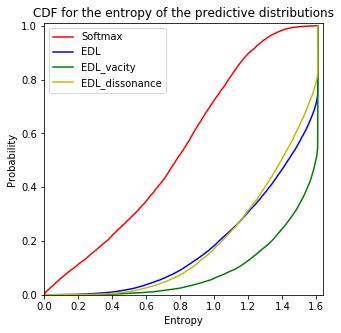

In [0]:
cdf_sm = np.histogram(entropies_c5_sm, bins=1000)[0];
cdf_sm = cdf_sm / np.sum(cdf_sm)
cdf_sm = np.cumsum(cdf_sm)
cdf_edl1 = np.histogram(entropies_c5_edl1,bins=1000)[0];
cdf_edl1 = cdf_edl1 / np.sum(cdf_edl1)
cdf_edl1 = np.cumsum(cdf_edl1)
cdf_edl_v = np.histogram(entropies_c5_edl_v,bins=1000)[0];
cdf_edl_v = cdf_edl_v / np.sum(cdf_edl_v)
cdf_edl_v = np.cumsum(cdf_edl_v)
cdf_edl_d = np.histogram(entropies_c5_edl_d,bins=1000)[0];
cdf_edl_d = cdf_edl_d / np.sum(cdf_edl_d)
cdf_edl_d = np.cumsum(cdf_edl_d)

cdf_edl1_in = np.histogram(entropies_c5_edl1_in,bins=1000)[0];
cdf_edl1_in = cdf_edl1_in / np.sum(cdf_edl1_in)
cdf_edl1_in = np.cumsum(cdf_edl1_in)

np.save('softmax_result.npy', entropies_c5_sm)
np.save('EDL_result.npy', entropies_c5_edl1)
np.save('EDL_vacuity_result.npy', entropies_c5_edl_v)
np.save('EDL_dissonance_result.npy', entropies_c5_edl_d)


xaxs= np.linspace(0,np.log(5),1000)
print(np.mean(cdf_sm), np.mean(cdf_edl1), np.mean(cdf_edl_v), np.mean(cdf_edl_d))
plt.figure(figsize=(5,5))
plt.plot(xaxs,cdf_sm,label="Softmax", color='r')
plt.plot(xaxs,cdf_edl1, label="EDL", color="b")
plt.plot(xaxs,cdf_edl_v, label="EDL_vacity", color="g")
plt.plot(xaxs,cdf_edl_d, label="EDL_dissonance", color="y")
# plt.plot(xaxs,cdf_edl1_in, label="EDL_in", color="k")


plt.legend(loc='upper left')
plt.xlim(0,np.log(5)+0.03)
plt.ylim(0,1.01)
plt.xlabel("Entropy")
plt.ylabel("Probability")
plt.title("CDF for the entropy of the predictive distributions")
plt.show()

In above plot, we see the CDFs of entropies of Softmax and EDL models trained with the first 5 classes of CIFAR10 dataset and tested with the last 5 classes (out-of-distribution). Again we observe that EDL yields higher entropy for these instances

## Acknowledgments
Our work and code benefit from this existing works, which we are very grateful.

EDL : https://github.com/atilberk/evidential-deep-learning-to-quantify-classification-uncertainty